In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Merging all EPs

In [309]:
final_queries = pd.read_csv("../Results/query_EP_categorised.csv")
gemma_EP = pd.read_csv("../Results/gemma_EP.csv")
gemma_RQ_EP = pd.read_csv("../Results/gemma_RQ_EP.csv")
gemma_RQ_avg_EP = pd.read_csv("../Results/gemma_RQ_avg_EP.csv")

gpt_EP = pd.read_csv("../Results/gpt_EP.csv")
gpt_RQ_EP = pd.read_csv("../Results/gpt_RQ_EP.csv")
gpt_RQ_avg_EP = pd.read_csv("../Results/gpt_RQ_avg_EP.csv")


emo_features = ["positive", "negative", "neutral", "joy", "anger", "surprise", "disgust", "fear", "sadness", "trust", "expectations"]
all_EP = []

for _, row in gemma_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "OG",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_avg_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_avg",
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gemma_RQ_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_"+row["gender"],
            "Gemma",
            emo,
            row[emo]
        ])

for _, row in gpt_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "OG",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_avg_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_avg",
            "GPT",
            emo,
            row[emo]
        ])

for _, row in gpt_RQ_EP.iterrows():
    query_row = final_queries.loc[final_queries["query"]==row["query"]]
    query_len = query_row["query_len_type"].iloc[0]
    query_sent = query_row["query_sentiment_type"].iloc[0]
    query_search = query_row["search_type"].iloc[0]
    for emo in emo_features:
        all_EP.append([
            row["query"],
            query_len,
            query_sent,
            query_search,
            "RQ_"+row["gender"],
            "GPT",
            emo,
            row[emo]
        ])

all_EP_df = pd.DataFrame(all_EP, columns=["query", "query_len_type", "query_sentiment", "query_search_type", "query_form", "LLM", "emo_feature_name", "emo_feature_percent"])
all_EP_df.to_csv("../Results/all_EP.csv", index=False)
all_EP_df

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,positive,30.22
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,negative,28.45
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,neutral,41.33
3,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,joy,12.34
4,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,anger,12.89
...,...,...,...,...,...,...,...,...
9675,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,disgust,12.09
9676,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,fear,12.71
9677,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,sadness,12.51
9678,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,trust,13.30


## Query distributions

In [310]:
final_queries.head()

,query,source,query_len_type,query_len,search_type,query_sentiment_type,topic,positive,negative,neutral,joy,anger,surprise,disgust,fear,sadness,trust,expectations
0,Chi era il padre di Micerino ?,IT-GUI,short,6,multisteps,neutral,history,25.31,30.15,44.54,12.53,13.28,12.68,11.67,12.12,12.82,13.11,11.81
1,Il figlio di Chefren,IT-GUI,short,4,multisteps,neutral,history,26.92,32.38,40.70,12.59,13.23,12.38,12.15,12.43,12.67,12.55,12.00
2,Il padre di Micerino,IT-GUI,short,4,multisteps,neutral,history,25.31,30.15,44.54,12.53,13.28,12.68,11.67,12.12,12.82,13.11,11.81
3,Micerino,IT-GUI,short,1,multisteps,positive,history,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Quanto e alta la tomba di Cheope?,IT-GUI,long,7,fact,neutral,history,28.06,31.37,40.57,12.56,12.96,12.69,12.17,12.33,12.77,12.19,12.32


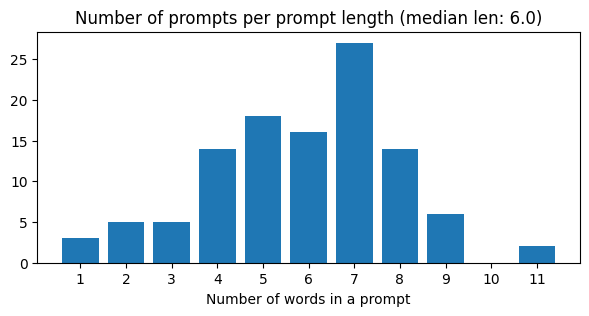

In [311]:
query_lengths = final_queries.query_len.value_counts().sort_index().keys().tolist()
query_len_counts = final_queries.query_len.value_counts().sort_index().values.tolist()

fig = plt.figure(figsize=(7,3))
ax = plt.bar(query_lengths, query_len_counts)
plt.xticks(list(range(min(query_lengths), max(query_lengths)+1)))
plt.xlabel("Number of words in a prompt")
plt.title("Number of prompts per prompt length (median len: " + str(round(np.median(final_queries.query_len), 2)) + ")")
plt.savefig("../Figures/Query_Distribution/prompt_length.pdf", dpi=300, bbox_inches='tight')
plt.show()

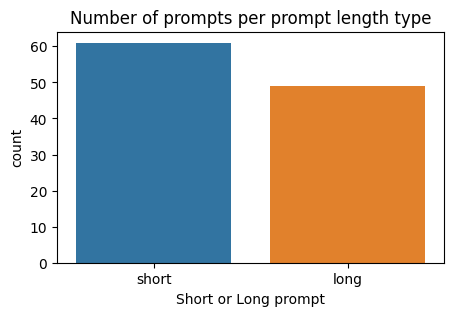

In [312]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(data=final_queries, x="query_len_type")
# plt.xticks(rotation=30)
plt.xlabel("Short or Long prompt")
plt.title("Number of prompts per prompt length type")
plt.savefig("../Figures/Query_distribution/prompt_len_type.pdf", dpi=300, bbox_inches="tight")
plt.show()

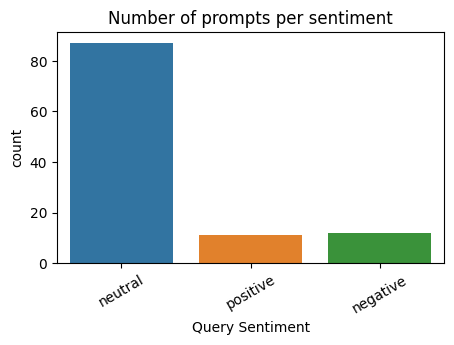

In [313]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(data=final_queries, x="query_sentiment_type")
plt.xticks(rotation=30)
plt.xlabel("Query Sentiment")
plt.title("Number of prompts per sentiment")
plt.savefig("../Figures/Query_distribution/sentiment.pdf", dpi=300, bbox_inches="tight")
plt.show()

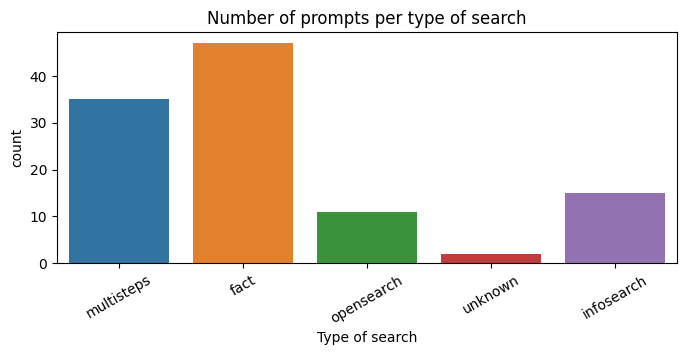

In [314]:
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(data=final_queries, x="search_type")
plt.xticks(rotation=30)
plt.xlabel("Type of search")
plt.title("Number of prompts per type of search")
plt.savefig("../Figures/Query_distribution/search_type.pdf", dpi=300, bbox_inches="tight")
plt.show()

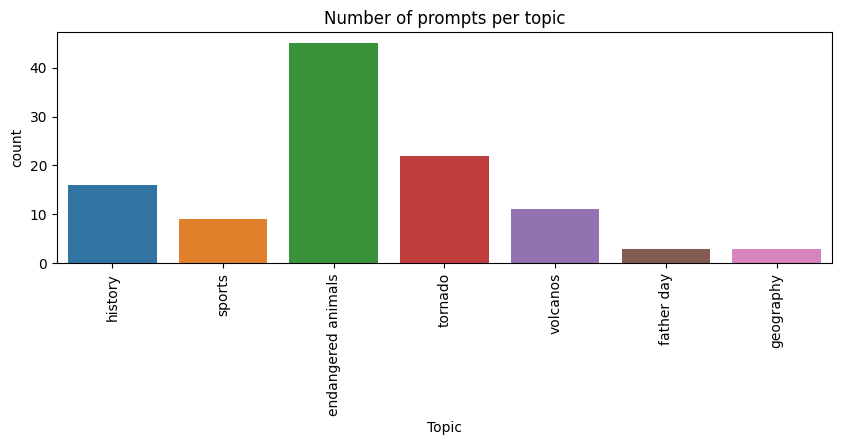

In [315]:
fig = plt.figure(figsize=(10,3))
ax = sns.countplot(data=final_queries, x="topic")
plt.xticks(rotation=90)
plt.title("Number of prompts per topic")
plt.xlabel("Topic")
plt.savefig("../Figures/Query_distribution/topic.pdf", dpi=300, bbox_inches = "tight")
plt.show()

## Response EPs

### General comparison

In [24]:
all_EP_df = pd.read_csv("../Results/all_EP.csv")
all_EP_df_sent = all_EP_df.loc[(all_EP_df["emo_feature_name"]=="positive") | (all_EP_df["emo_feature_name"]=="negative") | (all_EP_df["emo_feature_name"]=="neutral")]
all_EP_df_emo = all_EP_df.drop(index=all_EP_df_sent.index).reset_index().drop(columns=["index"])
all_EP_df_sent = all_EP_df_sent.reset_index().drop(columns=["index"])

In [25]:
all_EP_df_sent

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,positive,30.22
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,negative,28.45
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,neutral,41.33
3,Il figlio di Chefren,short,neutral,multisteps,OG,Gemma,positive,26.92
4,Il figlio di Chefren,short,neutral,multisteps,OG,Gemma,negative,32.38
...,...,...,...,...,...,...,...,...
2635,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_male,GPT,negative,26.30
2636,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_male,GPT,neutral,42.33
2637,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,positive,33.29
2638,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,negative,26.70


In [26]:
all_EP_df_emo

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,joy,12.34
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,anger,12.89
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,surprise,12.42
3,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,disgust,11.80
4,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,fear,12.35
...,...,...,...,...,...,...,...,...
7035,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,disgust,12.09
7036,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,fear,12.71
7037,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,sadness,12.51
7038,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_female,GPT,trust,13.30


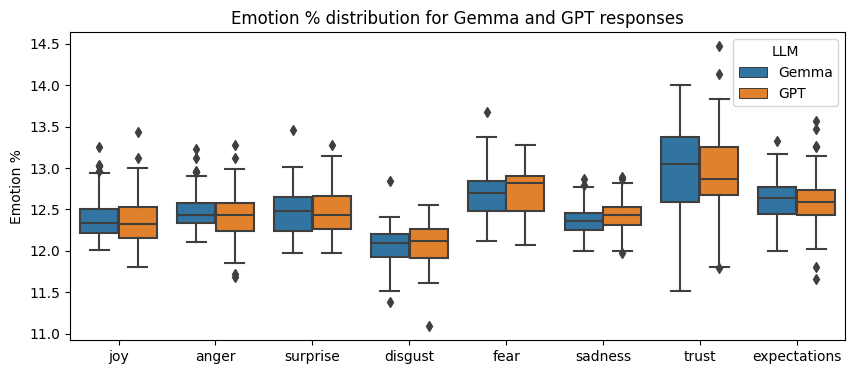

In [27]:
df = all_EP_df_emo.loc[(all_EP_df_emo["query_form"]=="OG")]
df = df.loc[df["emo_feature_percent"]!=0]
fig = plt.figure(figsize=(10,4))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
# plt.xlabel("Emotion")
plt.xlabel(None)
plt.ylabel("Emotion %")
plt.title(r"Emotion % distribution for Gemma and GPT responses")
plt.savefig("../Figures/Gemma_GPT/gen_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

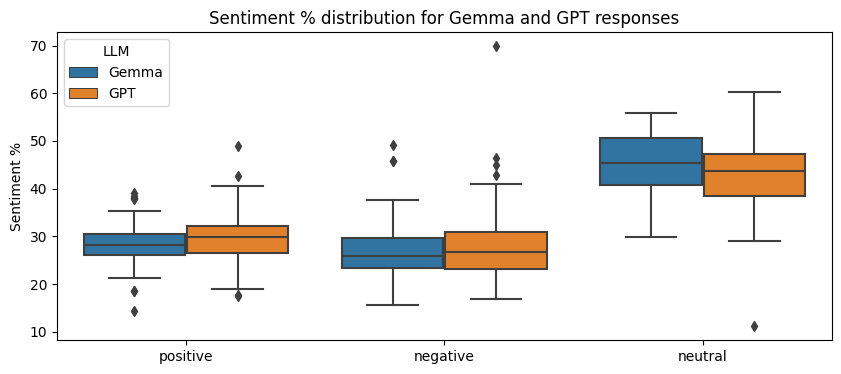

In [28]:
df = all_EP_df_sent.loc[(all_EP_df_sent["query_form"]=="OG")]
# df = df.loc[df["emo_feature_percent"]!=0]
fig = plt.figure(figsize=(10,4))
ax = sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="LLM", data=df)
# plt.xlabel("Sentiment")
plt.xlabel(None)
plt.ylabel("Sentiment %")
plt.title(r"Sentiment % distribution for Gemma and GPT responses")
plt.savefig("../Figures/Gemma_GPT/gen_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

### Prompt Category Wise

#### Prompt length

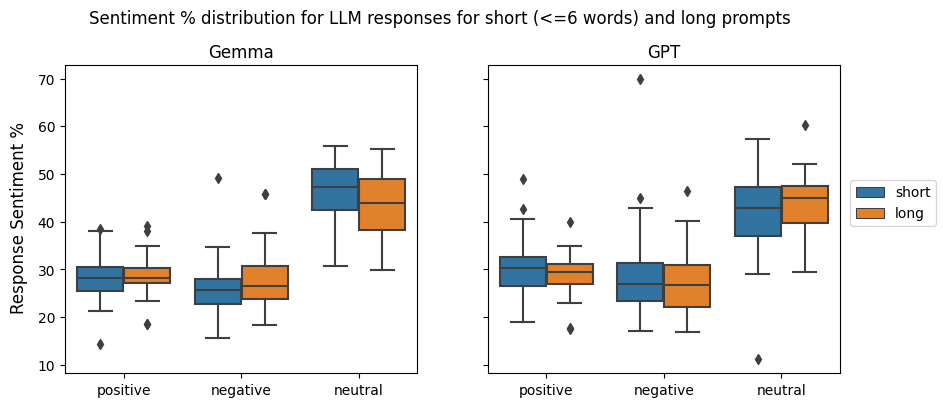

In [29]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG")]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.07)
fig.suptitle(r"Sentiment % distribution for LLM responses for short (<=6 words) and long prompts", y=1.02, x=0.5)
fig.legend(handles, labels, loc='right')
plt.savefig("../Figures/Query_categories/prompt_len_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

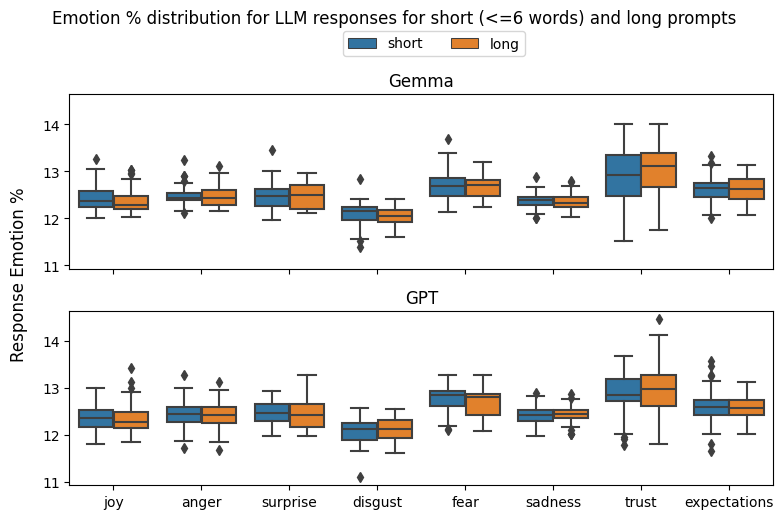

In [30]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_len_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for short (<=6 words) and long prompts", y=1.03)
fig.legend(handles, labels, loc='upper center', ncols=2, bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_len_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Prompt sentiment

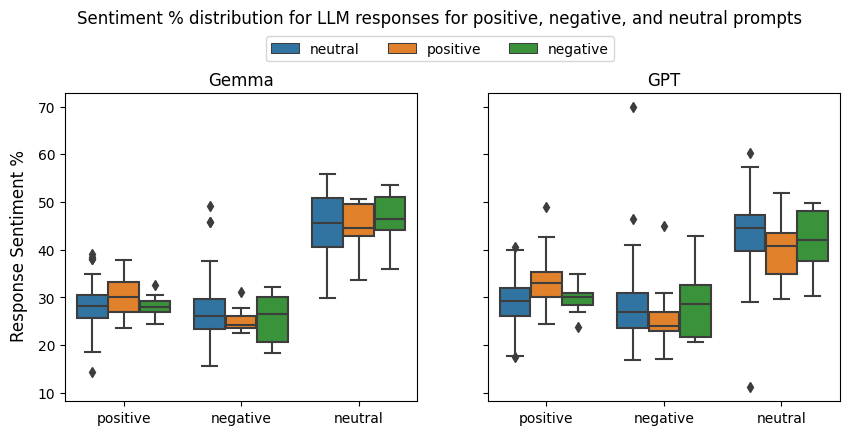

In [31]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG")]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.07)
fig.suptitle(r"Sentiment % distribution for LLM responses for positive, negative, and neutral prompts", y=1.09, x=0.5)
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor=(0.5, 1.04))
plt.savefig("../Figures/Query_categories/prompt_sentiment_type_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

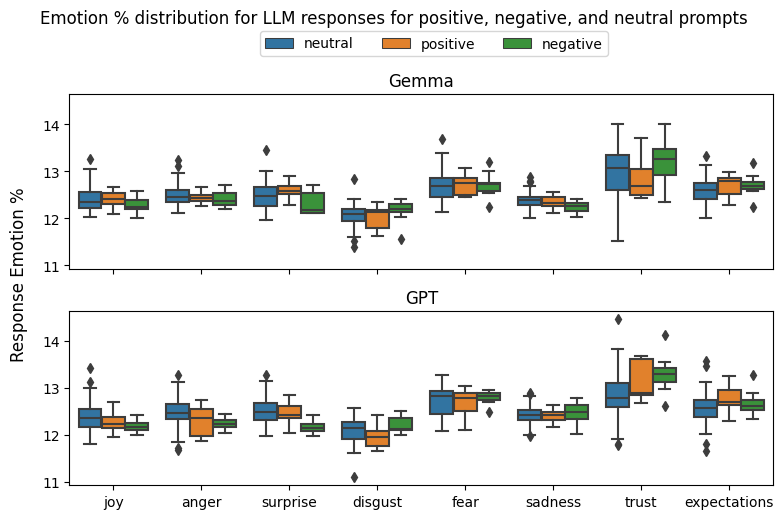

In [32]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG")]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_sentiment", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for positive, negative, and neutral prompts", y=1.03)
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_sentiment_type_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Prompt search type

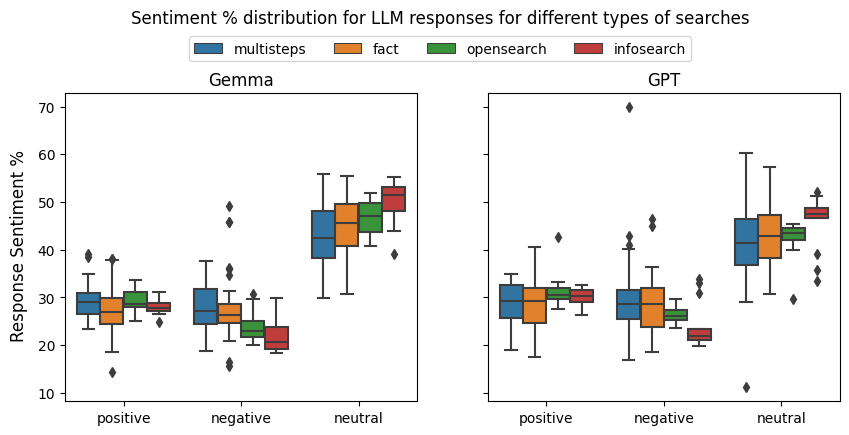

In [42]:
df_gemma = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="Gemma") & (all_EP_df_sent["query_form"]=="OG") & (all_EP_df_sent["query_search_type"]!="unknown")]
df_gpt = all_EP_df_sent.loc[(all_EP_df_sent["LLM"]=="GPT") & (all_EP_df_sent["query_form"]=="OG") & (all_EP_df_sent["query_search_type"]!="unknown")]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.07)
fig.suptitle(r"Sentiment % distribution for LLM responses for different types of searches", y=1.09, x=0.5)
fig.legend(handles, labels, loc='upper center', ncols=len(labels), bbox_to_anchor=(0.5, 1.04))
plt.savefig("../Figures/Query_categories/prompt_search_type_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

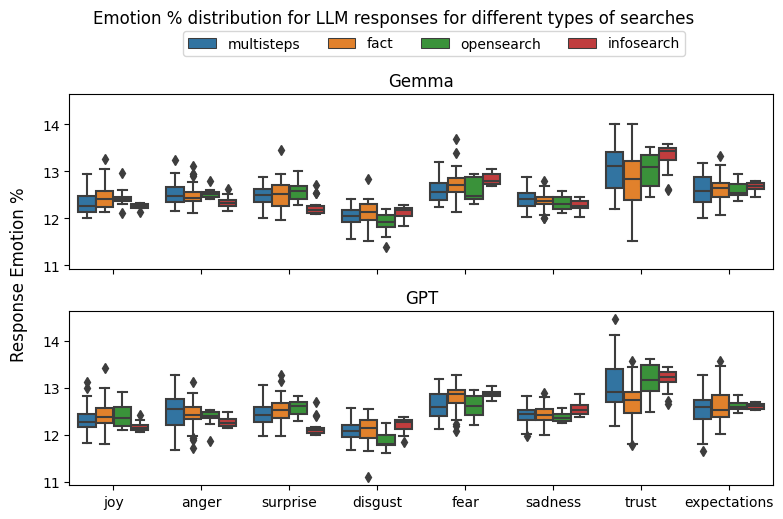

In [43]:
df_gemma = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="Gemma") & (all_EP_df_emo["query_form"]=="OG") & (all_EP_df_emo["query_search_type"]!="unknown")]
df_gpt = all_EP_df_emo.loc[(all_EP_df_emo["LLM"]=="GPT") & (all_EP_df_emo["query_form"]=="OG") & (all_EP_df_emo["query_search_type"]!="unknown")] 
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]!=0]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_search_type", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for different types of searches", y=1.03)
fig.legend(handles, labels, loc='upper center', ncols=len(labels), bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Query_categories/prompt_search_type_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

### Prompt reformulation 

#### OG vs RQ

In [327]:
OG_RQ_EP_df_emo = all_EP_df_emo.loc[(all_EP_df_emo["query_form"]=="OG") | (all_EP_df_emo["query_form"]=="RQ_avg")]
OG_RQ_EP_df_sent = all_EP_df_sent.loc[(all_EP_df_sent["query_form"]=="OG") | (all_EP_df_sent["query_form"]=="RQ_avg")]

In [328]:
OG_RQ_EP_df_emo

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,joy,12.340
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,anger,12.890
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,surprise,12.420
3,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,disgust,11.800
4,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,fear,12.350
...,...,...,...,...,...,...,...,...
5275,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,disgust,12.060
5276,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,fear,12.700
5277,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,sadness,12.535
5278,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,trust,13.085


In [329]:
OG_RQ_EP_df_sent

,query,query_len_type,query_sentiment,query_search_type,query_form,LLM,emo_feature_name,emo_feature_percent
0,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,positive,30.220
1,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,negative,28.450
2,Chi era il padre di Micerino ?,short,neutral,multisteps,OG,Gemma,neutral,41.330
3,Il figlio di Chefren,short,neutral,multisteps,OG,Gemma,positive,26.920
4,Il figlio di Chefren,short,neutral,multisteps,OG,Gemma,negative,32.380
...,...,...,...,...,...,...,...,...
1975,vulcano attivo antico,short,neutral,fact,RQ_avg,GPT,negative,25.585
1976,vulcano attivo antico,short,neutral,fact,RQ_avg,GPT,neutral,40.350
1977,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,positive,32.335
1978,vulcano piÃ¹ antico attivo,short,positive,fact,RQ_avg,GPT,negative,26.500


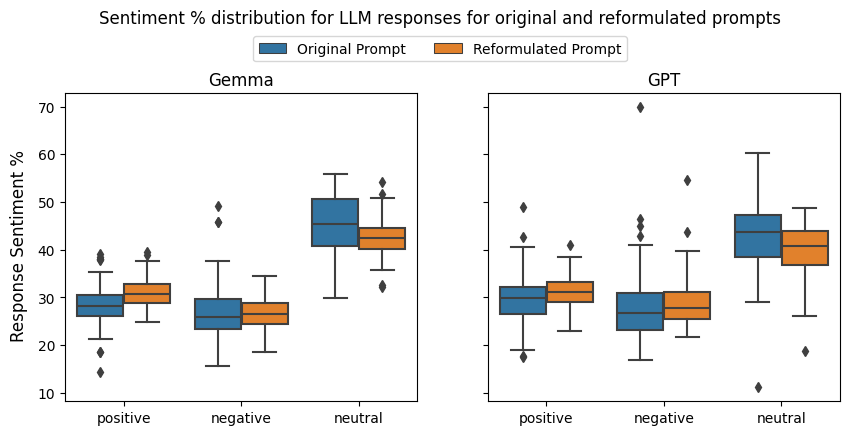

In [330]:
df_gemma = OG_RQ_EP_df_sent.loc[OG_RQ_EP_df_sent["LLM"]=="Gemma"]
df_gpt = OG_RQ_EP_df_sent.loc[OG_RQ_EP_df_sent["LLM"]=="GPT"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.07)
fig.suptitle(r"Sentiment % distribution for LLM responses for original and reformulated prompts", y=1.09, x=0.5)
fig.legend(handles, ["Original Prompt", "Reformulated Prompt"], loc='upper center', ncols=2, bbox_to_anchor=(0.5, 1.04))
plt.savefig("../Figures/Prompt_reformulation/OG_RQ_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

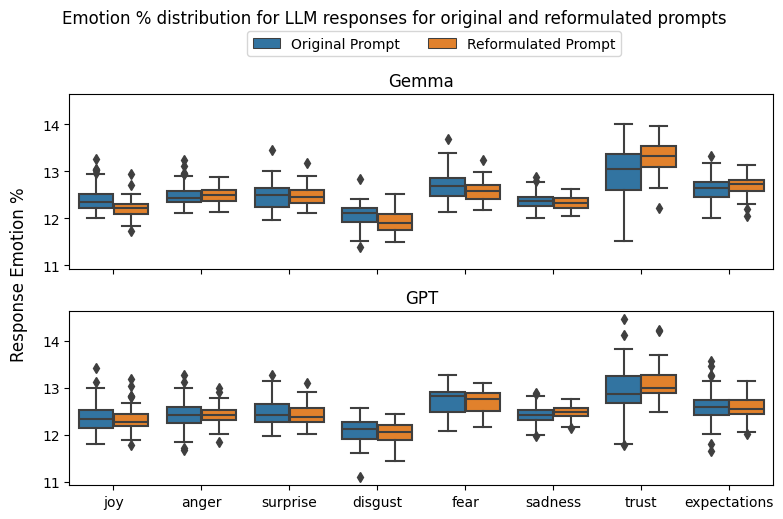

In [331]:
df_gemma = OG_RQ_EP_df_emo.loc[OG_RQ_EP_df_emo["LLM"]=="Gemma"]
df_gpt = OG_RQ_EP_df_emo.loc[OG_RQ_EP_df_emo["LLM"]=="GPT"]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]>=10]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for original and reformulated prompts", y=1.03)
fig.legend(handles, ["Original Prompt", "Reformulated Prompt"], loc='upper center', ncols=2, bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Prompt_reformulation/OG_RQ_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

#### Male vs Female RQ

In [7]:
gemma_rouge = pd.read_csv("../Results/rouge_scores_Gemma.csv")
gemma_rouge["LLM"] = "Gemma"
gpt_rouge = pd.read_csv("../Results/rouge_scores_GPT.csv")
gpt_rouge["LLM"] = "GPT"
LLM_rouge = pd.concat([gemma_rouge, gpt_rouge])
LLM_rouge.head()

,Query,OG_male_rougeL,OG_male_rougeLsum,OG_female_rougeL,OG_female_rougeLsum,female_male_rougeL,female_male_rougeLsum,LLM
0,Chi era il padre di Micerino ?,0.222222,0.277778,0.111111,0.111111,0.166667,0.166667,Gemma
1,Il figlio di Chefren,0.090909,0.090909,0.068966,0.068966,0.137931,0.137931,Gemma
2,Il padre di Micerino,0.170213,0.170213,0.127660,0.127660,0.764706,0.764706,Gemma
3,Micerino,0.000000,0.000000,0.011050,0.011050,0.187500,0.187500,Gemma
4,Quanto e alta la tomba di Cheope?,0.266667,0.266667,0.222222,0.266667,0.166667,0.166667,Gemma


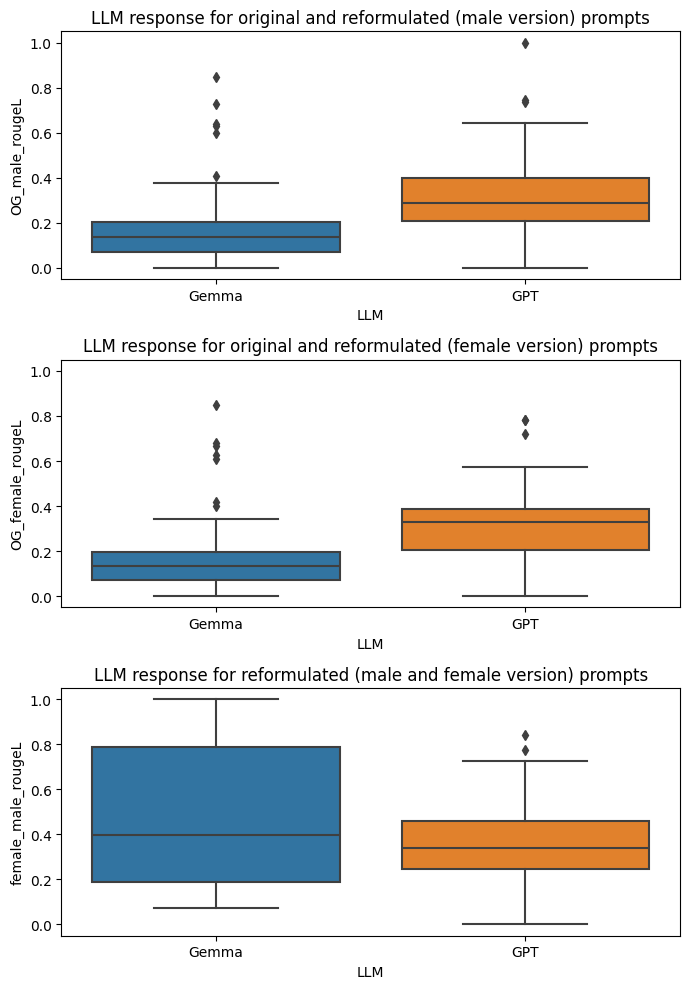

In [16]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharey=True, figsize = (7,10))
sns.boxplot(data=LLM_rouge, x="LLM", y="OG_male_rougeL", ax=axes[0])
axes[0].set_title("LLM response for original and reformulated (male version) prompts")
sns.boxplot(data=LLM_rouge, x="LLM", y="OG_female_rougeL", ax=axes[1])
axes[1].set_title("LLM response for original and reformulated (female version) prompts")
sns.boxplot(data=LLM_rouge, x="LLM", y="female_male_rougeL", ax=axes[2])
axes[2].set_title("LLM response for reformulated (male and female version) prompts")
plt.tight_layout()
plt.show()

In [332]:
male_female_EP_df_emo = all_EP_df_emo.loc[(all_EP_df_emo["query_form"]=="OG") | (all_EP_df_emo["query_form"]=="RQ_avg")]
male_female_EP_df_sent = all_EP_df_sent.loc[(all_EP_df_sent["query_form"]=="OG") | (all_EP_df_sent["query_form"]=="RQ_avg")]

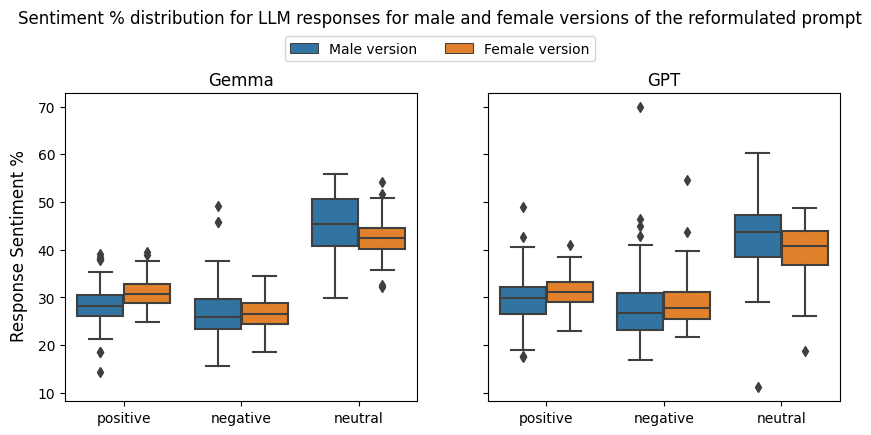

In [333]:
df_gemma = male_female_EP_df_sent.loc[OG_RQ_EP_df_sent["LLM"]=="Gemma"]
df_gpt = male_female_EP_df_sent.loc[OG_RQ_EP_df_sent["LLM"]=="GPT"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Sentiment %', x=0.07)
fig.suptitle(r"Sentiment % distribution for LLM responses for male and female versions of the reformulated prompt", y=1.09, x=0.5)
fig.legend(handles, ["Male version", "Female version"], loc='upper center', ncols=2, bbox_to_anchor=(0.5, 1.04))
plt.savefig("../Figures/Prompt_reformulation/male_female_sentiment.pdf", dpi=300, bbox_inches = "tight")
plt.show()

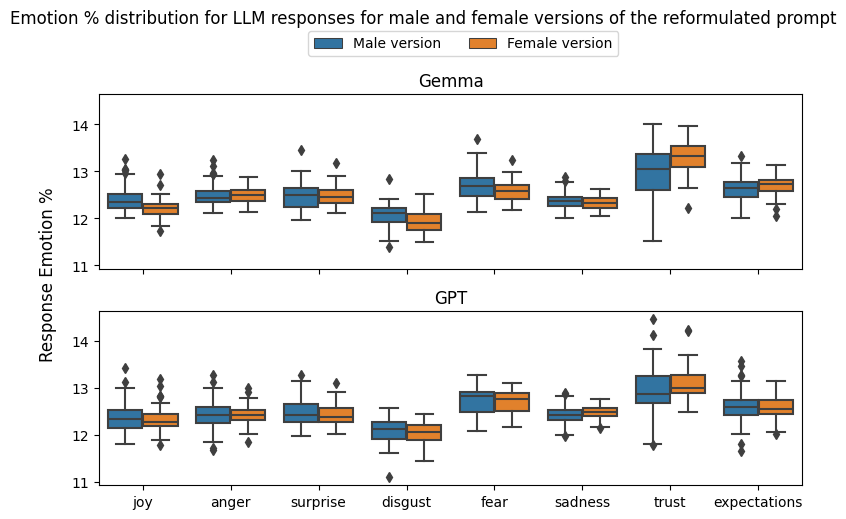

In [334]:
df_gemma = male_female_EP_df_emo.loc[male_female_EP_df_emo["LLM"]=="Gemma"]
df_gpt = male_female_EP_df_emo.loc[male_female_EP_df_emo["LLM"]=="GPT"]
df_gpt = df_gpt.loc[df_gpt["emo_feature_percent"]>=10]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,5), sharey=True, sharex=True)
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gemma, ax=axes[0])
sns.boxplot(x="emo_feature_name", y="emo_feature_percent", hue="query_form", data=df_gpt, ax=axes[1])
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
axes[0].set_ylabel(None)
axes[1].set_ylabel(None)
axes[0].set_title("Gemma")
axes[1].set_title("GPT")
axes[0].get_legend().remove()
axes[1].get_legend().remove()
handles, labels = axes[1].get_legend_handles_labels()

# fig.supxlabel('Prompt Sentiment', y=-0.05)
fig.supylabel('Response Emotion %')
fig.suptitle(r"Emotion % distribution for LLM responses for male and female versions of the reformulated prompt", y=1.03)
fig.legend(handles, ["Male version", "Female version"], loc='upper center', ncols=2, bbox_to_anchor = (0.55, 1))
fig.tight_layout()
plt.savefig("../Figures/Prompt_reformulation/male_female_emotion.pdf", dpi=300, bbox_inches = "tight")
plt.show()

## JSD

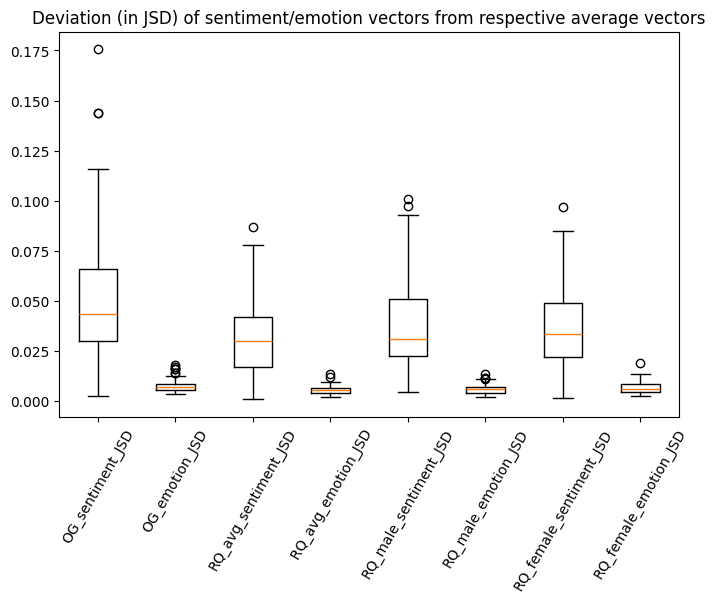

In [335]:
gemma_JSD = pd.read_csv("../Results/gemma_avg_JSD.csv")
# gemma_JSD.head()

fig = plt.figure(figsize=(8,5))
ax = plt.boxplot(gemma_JSD.drop(columns=["query"]), labels=gemma_JSD.drop(columns=["query"]).columns)
plt.xticks(rotation=60)
plt.title("Deviation (in JSD) of sentiment/emotion vectors from respective average vectors")
plt.show()


In [21]:
query_resp_JSD_gemma = pd.read_csv("../Results/query_resp_JSD_gemma.csv")
query_resp_JSD_gemma["LLM"] = "Gemma"
query_resp_JSD_gpt = pd.read_csv("../Results/query_resp_JSD_gpt.csv")
query_resp_JSD_gpt["LLM"] = "GPT"
query_resp_JSD = pd.concat([query_resp_JSD_gemma, query_resp_JSD_gpt])

query_resp_JSD.head()

,query,OG_sentiment_JSD,OG_emotion_JSD,RQ_avg_sentiment_JSD,RQ_avg_emotion_JSD,RQ_male_sentiment_JSD,RQ_male_emotion_JSD,RQ_female_sentiment_JSD,RQ_female_emotion_JSD,LLM
0,Chi era il padre di Micerino ?,0.038861,0.010362,0.075893,0.017103,0.089444,0.014732,0.063643,0.019927,Gemma
1,Il figlio di Chefren,0.000000,0.000000,0.064817,0.019062,0.093027,0.015429,0.036826,0.023318,Gemma
2,Il padre di Micerino,0.099105,0.011136,0.033280,0.013541,0.026061,0.010653,0.046321,0.019927,Gemma
3,Micerino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gemma
4,Quanto e alta la tomba di Cheope?,0.073418,0.009366,0.026199,0.007122,0.026912,0.004324,0.058732,0.013848,Gemma


<Axes: xlabel='LLM', ylabel='OG_sentiment_JSD'>

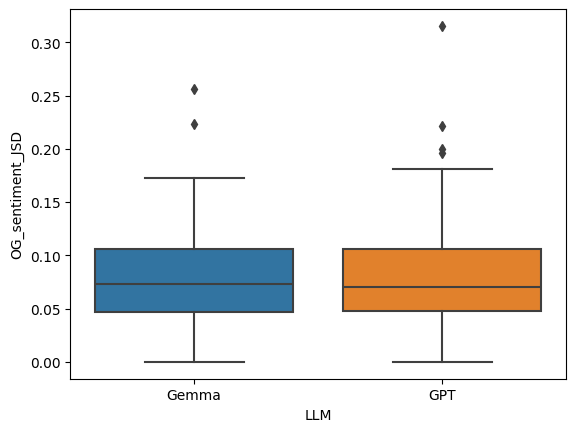

In [20]:
sns.boxplot(data=query_resp_JSD, x="LLM", y="OG_sentiment_JSD")

<Axes: xlabel='LLM', ylabel='OG_emotion_JSD'>

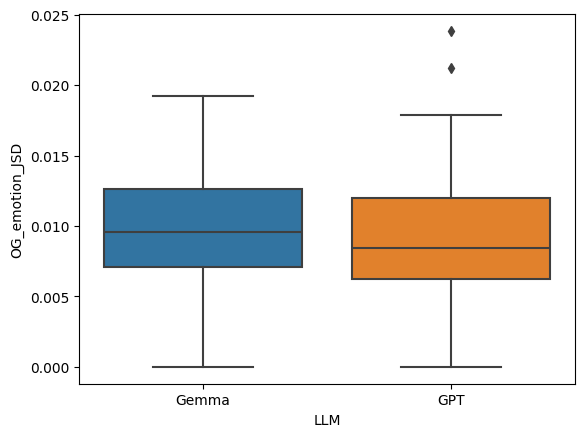

In [19]:
sns.boxplot(data=query_resp_JSD, x="LLM", y="OG_emotion_JSD")

<Axes: xlabel='LLM', ylabel='RQ_avg_sentiment_JSD'>

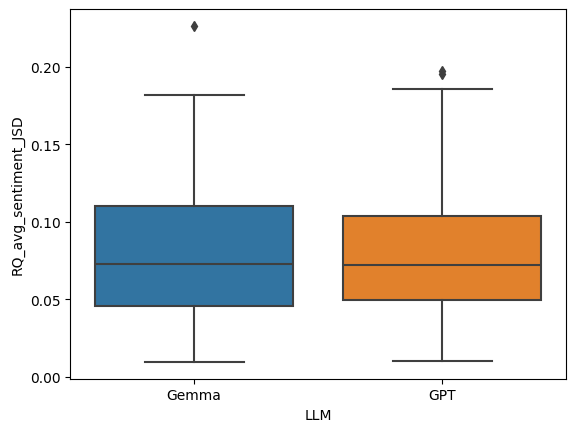

In [22]:
sns.boxplot(data=query_resp_JSD, x="LLM", y="RQ_avg_sentiment_JSD")

<Axes: xlabel='LLM', ylabel='RQ_avg_emotion_JSD'>

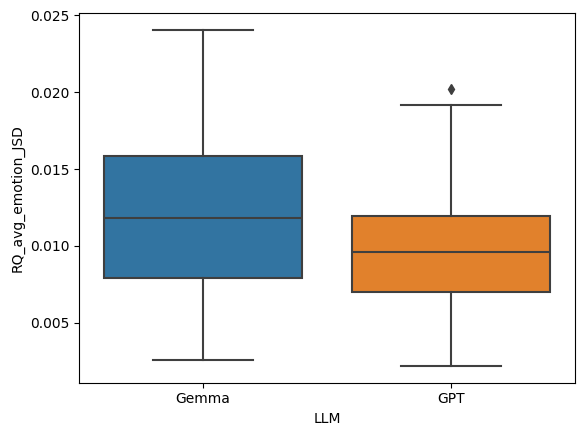

In [23]:
sns.boxplot(data=query_resp_JSD, x="LLM", y="RQ_avg_emotion_JSD")